In [74]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data_full = pd.DataFrame(iris.data, columns = iris.feature_names)
data = data_full[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.25, random_state = 5)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [48]:
lda.predict(X_test)

array([1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2])

In [49]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,2,1
2,2,1
3,0,0
4,2,2
5,1,1
6,0,0
7,1,1
8,0,0
9,1,1


In [50]:
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

In [51]:
print(f"коэффициенты дискриминантных линий \n {lda.coef_}")
print(f"координаты центроидов \n {lda.means_}")

коэффициенты дискриминантных линий 
 [[-6.1635963   8.16009229]
 [ 2.08852718 -4.21463677]
 [ 4.1849916  -4.16727851]]
координаты центроидов 
 [[5.00526316 3.45263158]
 [5.96666667 2.75277778]
 [6.55789474 2.98684211]]


In [52]:
y_train

array([0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0,
       2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2,
       2, 1])

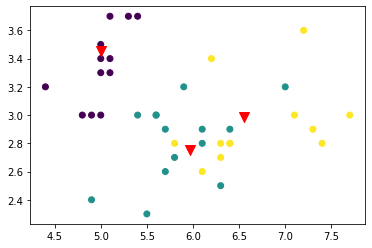

In [53]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:,0], lda.means_[:,1], c = 'r', s = 100, marker ='v')

### Кластеризация

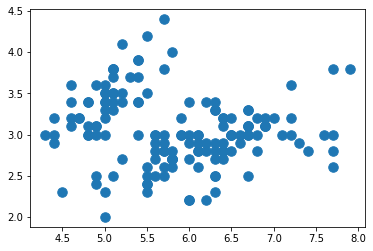

In [72]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], s = 90)

In [76]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

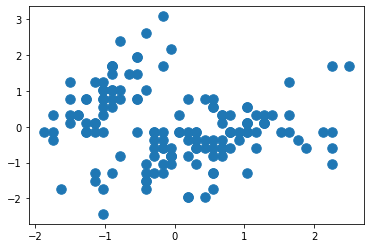

In [80]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], s = 90)

In [95]:
clusters_inertia = []
clusters_range = range(1,15)

for cluster in clusters_range:
    cluster_k = KMeans(n_clusters = cluster)
    cluster_kmeans = cluster_k.fit_predict(data_scaled)
    clusters_inertia.append(cluster_k.inertia_)

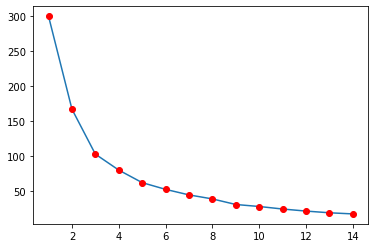

In [102]:
plt.plot(clusters_range, clusters_inertia)
plt.plot(clusters_range, clusters_inertia, 'ro')

### Оптимальное число кластеров = 4

In [116]:
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit_predict(data_scaled)
clusters

array([3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

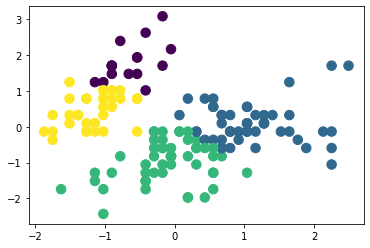

In [117]:
plt.scatter(data_scaled[:,0],data_scaled[:,1], s = 90, c = clusters)